# Linear Classifiers

In this assignment You will load a dataset and train a logistic regression classifier.

## The Dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

### 1. Import necessary packages.

For this exercise we need:
* pandas
* train_test_split
* LogisticRegression
* pyplot from matplotlib

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 2. Load and prepare the dataset.

1. Load the dataset into a dataframe named **df_data**.
1. Drop the name column. This column is not a feature required by the model.
1. Create a dataframe named **X** containing all the columns except the status.
1. Create a dataframe named **y** containing the status.

In [2]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')
df_data_1 = df_data.drop(['name'], axis = 1)
X = df_data_1.drop(['status'], axis = 1)
y = df_data_1['status']

### 3. Split the dataset into a training set and a test set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Create the model.

1. Instantiate a logistic regression classifier with a `lbfgs` solver and penalty set to `none`.
1. Fit the classifer to the data.

#### If the algorithm fails to converge, what change can you make to fix that?

In [4]:
# The answer had it like this:
# lr_score = lr.score(X_test, y_test)

# print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

In [5]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none')
lr.fit(X_train, y_train)

print('Accuracy score: %s' % lr.score(X_test, y_test))
print('Number of iterations: %s' % lr.n_iter_[0])

Accuracy score: 0.8163265306122449
Number of iterations: 100


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The algorithm failed to converge, so I will increase the number of iteration.

In [6]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 1000)
lr.fit(X_train, y_train)

print('Accuracy score of the first model: %s' % lr.score(X_test, y_test))
print('Number of iterations: %s' % lr.n_iter_[0])

lr_test_score = lr.score(X_test, y_test)
lr_train_score = lr.score(X_train, y_train)

print('Score on first training data: ', lr_train_score)
print('Score on first test data: ', lr_test_score)

Accuracy score of the first model: 0.8367346938775511
Number of iterations: 1000
Score on first training data:  0.8767123287671232
Score on first test data:  0.8367346938775511


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 6. L2 Regularization.

Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [7]:
# The answer had it like this:

# lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
# lr.fit(X_train, y_train)
# lr_score = lr.score(X_test, y_test)

# print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(

In [8]:
lr_l2 = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 10000)
lr_l2.fit(X_train, y_train)

lr_l2_test_score = lr_l2.score(X_test, y_test)
lr_l2_train_score = lr_l2.score(X_train, y_train)

print('Accuracy score of the L2 model: %s' % lr_l2.score(X_test, y_test))
print('Number of iterations: %s' % lr_l2.n_iter_[0])

print('Score on regularized training data: ', lr_l2_train_score)
print('Score on regularized test data: ', lr_l2_test_score)

Accuracy score of the L2 model: 0.7959183673469388
Number of iterations: 252
Score on regularized training data:  0.8904109589041096
Score on regularized test data:  0.7959183673469388


The regularized training data is less accurate.

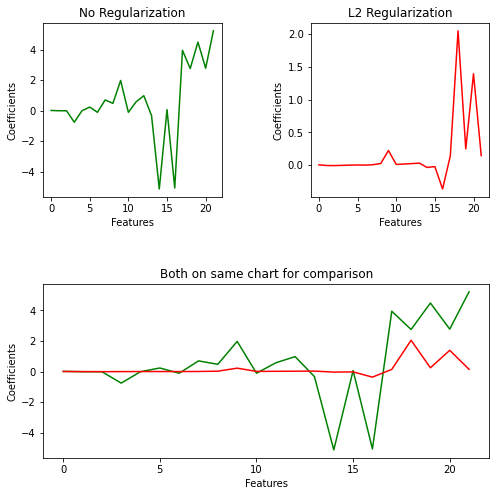

In [9]:
fig = plt.figure(figsize = (8, 8))
grid = plt.GridSpec(2, 2, hspace = 0.5, wspace = 0.5)

x = np.arange(0, len(lr.coef_[0]), 1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel = 'Features', ylabel = 'Coefficients') 
ax1.set_title('No Regularization')

y_reg = lr_l2.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')
ax3.set(xlabel = 'Features', ylabel = 'Coefficients')
ax3.set_title('Both on same chart for comparison')

plt.show()

### 7. Choose the C parameter.

Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

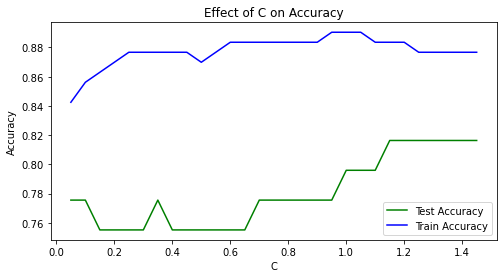

In [10]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = c, max_iter = 10000)
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))
    
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label = 'Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label = 'Train Accuracy')
ax1.set(xlabel = 'C', ylabel = 'Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()

plt.show()

The best accuracy for both seems to be around between 1.2 and 1.4. The minimum distance between training and test accuracy in the range seems to be the 1.3 mark. Thus, 1.3 is the best choice for C. 